# Recommender Systems

## What are recommender systems

# Simple Recommenders

## Dataset

**Full MovieLense Dataset**. Dataset vsebuje metapodatke za 45'000 filmov izdanih pred Julijem 2017. Za filme imamo podatke o igralcih, direktorju, plot keywords, revenue, jezik, production companies, TMDB vote counts, vote averages, itd.

* `movies_metadata.csv`: datoteka vsebuje informacije za okoli 45'000 filmov kot so *budget, žanr, revenue, production countries, copmanies, ...*
* `keywords.csv`: datoteka vsebuje *plot keywords* 
* `credits.csv`: vsebuje informacije o *Cast and Crew*
* `links.csv`: vsebuje TMDB in IMDB IDs za vse filme
* `links_small.csv`: vsebuje TMDB in IMDB IDs za manjši subset 9'000 filmov
* `ratings_small.csv`: vsebuje informacije glede 100'000 ratingsov od 700 userjev za 9'000 filmov

Podatke katere bomo uporabljali je dostopna na [linku](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/)



In [2]:
import pandas as pd

metadata = pd.read_csv('./data/movies_metadata.csv', low_memory=False)
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


**Določitev metrike**


$\begin{equation} \text Weighted Rating (\bf WR) = \left({{\bf v} \over {\bf v} + {\bf m}} \cdot R\right) + \left({{\bf m} \over {\bf v} + {\bf m}} \cdot C\right) \end{equation}$

* `v` predstavlja število glasov za posamezen film. V datasetu imamo stolpec `vote_count`
* `R` je povprečna ocena filma. V podatkih imamo vrednost v stolpcu `vote_average`
* `C` je povprečna ocena za vse filme skupaj
* `m` je minimalno število glasov potrebno za umestitev filma na lestvico. V našem primeru bomo odstranili 90% filmov.

In [3]:
C = metadata['vote_average'].mean()
print("C:", C)

m = metadata['vote_count'].quantile(0.90)
print("m:", m)

C: 5.618207215134185
m: 160.0


In [4]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= m]
q_movies.shape

(4555, 24)

**Izračun metrik**

In [5]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [6]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies[["original_title", "score"]].head()

,original_title,score
0,Toy Story,7.640253
1,Jumanji,6.820293
4,Father of the Bride Part II,5.660700
5,Heat,7.537201
8,Sudden Death,5.556626


**Sortiranje glede na metriko**

In [7]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 20 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


# Content-Based Recommender

In [8]:
metadata_subset = metadata.loc[:15_000, :].copy()
metadata_subset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Plot Description Based Recommender

In [9]:
#Print plot overviews of the first 5 movies.
metadata_subset['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [10]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
metadata_subset['overview'] = metadata_subset['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata_subset['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(15001, 40226)

In [11]:
tfidf.vocabulary_

{'led': 20600,
 'woody': 39518,
 'andy': 1739,
 'toys': 36574,
 'live': 21105,
 'happily': 15908,
 'room': 30621,
 'birthday': 3991,
 'brings': 4889,
 'buzz': 5331,
 'lightyear': 20936,
 'scene': 31454,
 'afraid': 1080,
 'losing': 21345,
 'place': 27272,
 'heart': 16183,
 'plots': 27389,
 'circumstances': 6748,
 'separate': 31967,
 'owner': 25995,
 'duo': 11017,
 'eventually': 12244,
 'learns': 20568,
 'aside': 2375,
 'differences': 9919,
 'siblings': 32595,
 'judy': 19125,
 'peter': 26899,
 'discover': 10135,
 'enchanted': 11688,
 'board': 4269,
 'game': 14298,
 'opens': 25531,
 'door': 10609,
 'magical': 21767,
 'world': 39556,
 'unwittingly': 37789,
 'invite': 18413,
 'alan': 1272,
 'adult': 972,
 'trapped': 36725,
 'inside': 18087,
 '26': 375,
 'years': 39813,
 'living': 21119,
 'hope': 16870,
 'freedom': 13924,
 'finish': 13252,
 'proves': 28328,
 'risky': 30361,
 'running': 30858,
 'giant': 14674,
 'rhinoceroses': 30188,
 'evil': 12270,
 'monkeys': 23732,
 'terrifying': 35824,
 '

In [12]:
tfidf.get_feature_names_out()[16_946:16_955 ]

array(['hospital', 'hospitalised', 'hospitality', 'hospitalization',
       'hospitalized', 'hospitals', 'hosptial', 'host', 'hostage'],
      dtype=object)

In [13]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(15001, 15001)

In [14]:
cosine_sim.shape

(15001, 15001)

In [20]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata_subset.index, index=metadata_subset['title']).drop_duplicates()
indices[:10]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [21]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata_subset['title'].iloc[movie_indices]

In [22]:
get_recommendations('The Dark Knight')

1328                                Batman Returns
150                                 Batman Forever
3095                  Batman: Mask of the Phantasm
585                                         Batman
9230            Batman Beyond: Return of the Joker
10122                                Batman Begins
9169     The Batman Superman Movie: World's Finest
12289                                     Ricochet
9139                  Batman & Mr. Freeze: SubZero
3267                                           JFK
Name: title, dtype: object

In [23]:
get_recommendations('The Godfather')

1178      The Godfather: Part II
1914     The Godfather: Part III
11297           Household Saints
10821                   Election
8653                Violent City
13177               I Am the Law
6711                    Mobsters
6977             Queen of Hearts
2891              American Movie
4464             Family Business
Name: title, dtype: object

## Credits, Genres and Keywords Based Recommender

In [25]:
metadata = pd.read_csv('./data/movies_metadata.csv', low_memory=False)
metadata = metadata.loc[:15_000, :].copy()
# Load keywords and credits
credits = pd.read_csv('./data/credits.csv')
keywords = pd.read_csv('./data/keywords.csv')

# Remove rows with bad IDs.
#metadata = metadata.drop([19730, 29503, 35587])

# Convert IDs to int. Required for merging
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

# Merge keywords and credits into your main metadata dataframe
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [26]:
metadata[["original_title", "cast", "crew", "keywords"]].head()

,original_title,cast,crew,keywords
0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [27]:
from ast import literal_eval
import numpy as np


features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

# Define new director, cast, genres and keywords features that are in a suitable form.
metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

# Print the new features of the first 3 films
metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [28]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy]","[animation, comedy, family]"
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbook]","[adventure, fantasy, family]"
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger]","[romance, comedy]"


In [29]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

# Create a new soup feature
metadata['soup'] = metadata.apply(create_soup, axis=1)
print(metadata.shape)
metadata[['title', 'soup']].head(2)

(15094, 29)


,title,soup
0,Toy Story,jealousy toy boy tomhanks timallen donrickles ...
1,Jumanji,boardgame disappearance basedonchildren'sbook ...


In [30]:
metadata = metadata[metadata["vote_count"] > 20]
metadata.shape

(8518, 29)

In [31]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])

count_matrix.shape

(8518, 17805)

In [32]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Reset index of your main DataFrame and construct reverse mapping as before
metadata = metadata.reset_index()
indices = pd.Series(metadata.index, index=metadata['title'])

In [33]:
get_recommendations('The Dark Knight', cosine_sim)

6108                Talent for the Game
6785                                Elf
7283                 Laws of Attraction
3192                            The Kid
3035              The Last Picture Show
5119                     Tender Cousins
1668                    The Prophecy II
2509                           Trippin'
4565                       Left Luggage
5379    Martin Lawrence Live: Runteldat
Name: title, dtype: object

# Collaborative Filtering

![data](./images/rating-matrix.png)

## Dataset

In [34]:
import pandas as pd

In [35]:
ratings = pd.read_csv("./data/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [37]:
movies = pd.read_csv("./data/u.item", sep="|", header=None)
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


---

In [38]:
import matplotlib.pyplot as plt

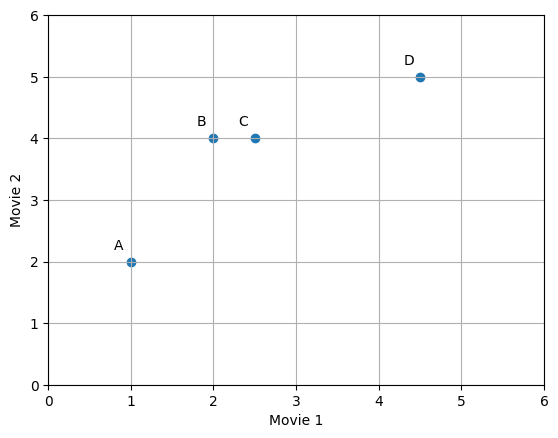

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Simple data
a = [1.0, 2.0]
b = [2.0, 4.0]
c = [2.5, 4.0]
d = [4.5, 5.0]

data = pd.DataFrame([a, b, c, d], columns=["Movie_1", "Movie_2"], index=list("ABCD"))

# Scatter plot
plt.scatter(data["Movie_1"], data["Movie_2"])

# Add labels and index names
for idx, row in data.iterrows():
    plt.annotate(idx, (row["Movie_1"] - 0.2, row["Movie_2"] + 0.2))

# Add labels to axes
plt.xlabel("Movie 1")
plt.ylabel("Movie 2")

plt.xlim(0,6)
plt.ylim(0,6)

# Display gridlines
plt.grid(True)

# Show the plot
plt.show()

**Calculating similarity**

In [40]:
from scipy import spatial

print(spatial.distance.euclidean(c, a))
print(spatial.distance.euclidean(c, b))
print(spatial.distance.euclidean(c, d))

2.5
0.5
2.23606797749979


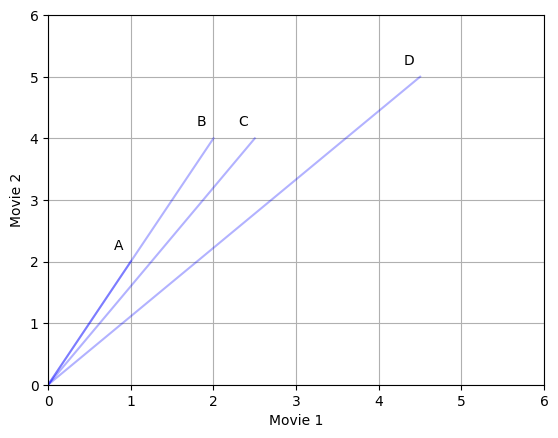

In [41]:
# Create a scatter plot
fig, ax = plt.subplots()

# Add labels and index names
for idx, row in data.iterrows():
    ax.plot([0, row["Movie_1"]], [0, row["Movie_2"]], c="blue", alpha=0.3)
    ax.annotate(idx, (row["Movie_1"] - 0.2, row["Movie_2"] + 0.2))

# Add labels to axes
plt.xlabel("Movie 1")
plt.ylabel("Movie 2")

plt.xlim(0,6)
plt.ylim(0,6)

# Display gridlines
plt.grid(True)

# Show the plot
plt.show()

In [42]:
print(spatial.distance.cosine(a,b))

print(spatial.distance.cosine(c,b))
print(spatial.distance.cosine(c,d))

0
0.004504527406047898
0.015137225946083022


---

**Calculating new rating**

---

## User-Based vs Item-Based Collaborative Filtering

# Realen Primer

In [43]:
movies = pd.read_csv("./data/u.item", sep="|", header=None)
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# Load the MovieLens 100k dataset
columns = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_csv('./data/u.data', sep='\t', names=columns)
print("Raw data shape:", raw_data.shape)

Raw data shape: (100003, 4)


In [45]:
data = raw_data.copy()
data["item_id"] = data["item_id"].replace(movies[0].values, movies[1].values)
data.drop_duplicates(subset=["user_id", "item_id"], inplace=True)
print("Data shape after duplicated drop: ", data.shape)
data.head()

Data shape after duplicated drop:  (99696, 4)


,user_id,item_id,rating,timestamp
0,0,Star Wars (1977),5,881250949
1,0,"Empire Strikes Back, The (1980)",5,881250949
2,0,Gone with the Wind (1939),1,881250949
3,196,Kolya (1996),3,881250949
4,186,L.A. Confidential (1997),3,891717742


In [46]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99696 entries, 0 to 99695
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    99696 non-null  int64 
 1   item_id    99696 non-null  object
 2   rating     99696 non-null  int64 
 3   timestamp  99696 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ MB


In [47]:
# Create a user-item rating matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating')
# each row is user. Each column is movie. Row shows what rating did user give to what movies

user_item_matrix

item_id,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
unbiased = user_item_matrix.iloc[:, :].apply(lambda row: row - row.mean(), axis=1)
# unbiased.fillna(0, inplace=True)
unbiased.head()

item_id,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-1.605166,1.394834,NaN,NaN,-0.605166,0.394834,NaN,NaN,...,NaN,NaN,NaN,1.394834,-0.605166,NaN,NaN,NaN,0.394834,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.704918,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.773585,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
from scipy import spatial

def calc_cosine_distance(user, other_user):
    user = user.copy().fillna(0)
    other_user = other_user.copy().fillna(0)
    user = user.values
    other_user = other_user.values
    return spatial.distance.cosine(user, other_user)

In [50]:
def get_rating(user_id, movie, data):
    """We want to get a rating for user U, about movie I he hadn't seen yet"""
    print(f"We have user ID: {user_id}.")
    print(f"We want to see how he would rate movie: {movie}")

    user = data.loc[user_id, :]
    user_bias = user_item_matrix.loc[user_id, :].mean()
    
    if not pd.isna(user[movie]):
        print("User already saw the movie.")
    else:
        print("User hasn't seen the movie yet.")

        # Get all people who saw the movie
        filter_ = data[movie].notnull()
        watched_movie = data[filter_]
        print(f"{watched_movie.shape[0]} people have rated this movie.")

        print("The user rated following movies:\n")
        print(user[user.notnull()] + user_bias)

        # Calculate similarity between users
        watched_movie["similarity"] = watched_movie.apply(lambda row: calc_cosine_distance(user, row), axis=1)
        watched_movie.sort_values(by="similarity", inplace=True, ascending=True)
        top_5_similar_users = watched_movie.head()
        print("\nTop 5 similar users by ID: ", top_5_similar_users.index.values)

        # Calculating the average score
        top_5_scores = data.loc[top_5_similar_users.index.values, movie]
        average_score = top_5_scores.mean()

        print(f"Naš user bi {movie} ocenil z {average_score + user_bias : .2f}")



user_id = 3
movie = "101 Dalmatians (1996)"
get_rating(user_id, movie, unbiased)

We have user ID: 3.
We want to see how he would rate movie: 101 Dalmatians (1996)
User hasn't seen the movie yet.
109 people have rated this movie.
The user rated following movies:

item_id
187 (1997)                                                     2.0
Air Force One (1997)                                           2.0
Alien: Resurrection (1997)                                     3.0
Apostle, The (1997)                                            4.0
Bean (1997)                                                    2.0
Boogie Nights (1997)                                           5.0
Chasing Amy (1997)                                             3.0
Conspiracy Theory (1997)                                       5.0
Contact (1997)                                                 2.0
Cop Land (1997)                                                4.0
Crash (1996)                                                   1.0
Critical Care (1997)                                           1.0
Dante'

C:\Users\ygreg\AppData\Local\Temp\ipykernel_8840\1714467747.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watched_movie["similarity"] = watched_movie.apply(lambda row: calc_cosine_distance(user, row), axis=1)
C:\Users\ygreg\AppData\Local\Temp\ipykernel_8840\1714467747.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watched_movie.sort_values(by="similarity", inplace=True, ascending=True)
